# 라이브러리 및 데이터 로드

In [101]:
# 한글패치
!sudo apt-get install -y fonts-nanum  # 오픈폰트인 나눔폰트 설치
!sudo fc-cache -fv # matplotlib에 자체적으로 캐싱을 하고있는데 안에 폰트파일이 포함되어 있다 그래서 이 캐싱파일에 업데이트 되야 나눔폰트 설치한걸 인식해서 다 날려줌
!rm ~/.cache/matplotlib -rf # 설치한 나눔폰트를 적용

Reading package lists... Done
Building dependency tree       
Reading state information... Done
fonts-nanum is already the newest version (20170925-1).
0 upgraded, 0 newly installed, 0 to remove and 39 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 10 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/var/cache/fontconfig: cleaning cache directory
/root/.cache/fontconfig: not cleaning non-existent cache directory
/root/.fontconfig: not cleaning non-existent cache directory
fc-cache: succeeded


In [102]:
# 나눔바른고딕체 사용
import matplotlib.pyplot as plt

plt.rc('font', family='NanumBarunGothic') 

In [103]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [104]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
submission = pd.read_csv('sample_submission.csv')
age_gender = pd.read_csv('age_gender_info.csv')

# 데이터 확인하기

In [105]:
train

,단지코드,총세대수,임대건물구분,지역,공급유형,전용면적,전용면적별세대수,공가수,자격유형,임대보증금,임대료,도보 10분거리 내 지하철역 수(환승노선 수 반영),도보 10분거리 내 버스정류장 수,단지내주차면수,등록차량수
0,C2483,900,아파트,경상북도,국민임대,39.72,134,38.0,A,15667000,103680,0.0,3.0,1425.0,1015.0
1,C2483,900,아파트,경상북도,국민임대,39.72,15,38.0,A,15667000,103680,0.0,3.0,1425.0,1015.0
2,C2483,900,아파트,경상북도,국민임대,51.93,385,38.0,A,27304000,184330,0.0,3.0,1425.0,1015.0
3,C2483,900,아파트,경상북도,국민임대,51.93,15,38.0,A,27304000,184330,0.0,3.0,1425.0,1015.0
4,C2483,900,아파트,경상북도,국민임대,51.93,41,38.0,A,27304000,184330,0.0,3.0,1425.0,1015.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2947,C2532,239,아파트,강원도,국민임대,49.20,19,7.0,A,11346000,116090,0.0,1.0,166.0,146.0
2948,C2532,239,아파트,강원도,국민임대,51.08,34,7.0,A,14005000,142310,0.0,1.0,166.0,146.0
2949,C2532,239,아파트,강원도,국민임대,51.73,34,7.0,A,14005000,142310,0.0,1.0,166.0,146.0
2950,C2532,239,아파트,강원도,국민임대,51.96,114,7.0,A,14005000,142310,0.0,1.0,166.0,146.0


In [106]:
test

,단지코드,총세대수,임대건물구분,지역,공급유형,전용면적,전용면적별세대수,공가수,자격유형,임대보증금,임대료,도보 10분거리 내 지하철역 수(환승노선 수 반영),도보 10분거리 내 버스정류장 수,단지내주차면수
0,C1072,754,아파트,경기도,국민임대,39.79,116,14.0,H,22830000,189840,0.0,2.0,683.0
1,C1072,754,아파트,경기도,국민임대,46.81,30,14.0,A,36048000,249930,0.0,2.0,683.0
2,C1072,754,아파트,경기도,국민임대,46.90,112,14.0,H,36048000,249930,0.0,2.0,683.0
3,C1072,754,아파트,경기도,국민임대,46.90,120,14.0,H,36048000,249930,0.0,2.0,683.0
4,C1072,754,아파트,경기도,국민임대,51.46,60,14.0,H,43497000,296780,0.0,2.0,683.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1017,C1267,675,아파트,경상남도,행복주택,36.77,126,38.0,L,-,-,0.0,1.0,467.0
1018,C2189,382,아파트,전라북도,국민임대,29.19,96,45.0,H,6872000,106400,0.0,2.0,300.0
1019,C2189,382,아파트,전라북도,국민임대,29.19,20,45.0,H,6872000,106400,0.0,2.0,300.0
1020,C2189,382,아파트,전라북도,국민임대,39.45,202,45.0,H,13410000,144600,0.0,2.0,300.0


In [107]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2952 entries, 0 to 2951
Data columns (total 15 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   단지코드                          2952 non-null   object 
 1   총세대수                          2952 non-null   int64  
 2   임대건물구분                        2952 non-null   object 
 3   지역                            2952 non-null   object 
 4   공급유형                          2952 non-null   object 
 5   전용면적                          2952 non-null   float64
 6   전용면적별세대수                      2952 non-null   int64  
 7   공가수                           2952 non-null   float64
 8   자격유형                          2952 non-null   object 
 9   임대보증금                         2383 non-null   object 
 10  임대료                           2383 non-null   object 
 11  도보 10분거리 내 지하철역 수(환승노선 수 반영)  2741 non-null   float64
 12  도보 10분거리 내 버스정류장 수            2948 non-null   float64
 13  단지내

In [108]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1022 entries, 0 to 1021
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   단지코드                          1022 non-null   object 
 1   총세대수                          1022 non-null   int64  
 2   임대건물구분                        1022 non-null   object 
 3   지역                            1022 non-null   object 
 4   공급유형                          1022 non-null   object 
 5   전용면적                          1022 non-null   float64
 6   전용면적별세대수                      1022 non-null   int64  
 7   공가수                           1022 non-null   float64
 8   자격유형                          1020 non-null   object 
 9   임대보증금                         842 non-null    object 
 10  임대료                           842 non-null    object 
 11  도보 10분거리 내 지하철역 수(환승노선 수 반영)  980 non-null    float64
 12  도보 10분거리 내 버스정류장 수            1022 non-null   float64
 13  단지내

In [109]:
train.isnull().sum()

단지코드                              0
총세대수                              0
임대건물구분                            0
지역                                0
공급유형                              0
전용면적                              0
전용면적별세대수                          0
공가수                               0
자격유형                              0
임대보증금                           569
임대료                             569
도보 10분거리 내 지하철역 수(환승노선 수 반영)    211
도보 10분거리 내 버스정류장 수                4
단지내주차면수                           0
등록차량수                             0
dtype: int64

In [110]:
test.isnull().sum()

단지코드                              0
총세대수                              0
임대건물구분                            0
지역                                0
공급유형                              0
전용면적                              0
전용면적별세대수                          0
공가수                               0
자격유형                              2
임대보증금                           180
임대료                             180
도보 10분거리 내 지하철역 수(환승노선 수 반영)     42
도보 10분거리 내 버스정류장 수                0
단지내주차면수                           0
dtype: int64

In [111]:
train[train['임대보증금']==train['임대료']].count()

단지코드                            12
총세대수                            12
임대건물구분                          12
지역                              12
공급유형                            12
전용면적                            12
전용면적별세대수                        12
공가수                             12
자격유형                            12
임대보증금                           12
임대료                             12
도보 10분거리 내 지하철역 수(환승노선 수 반영)    12
도보 10분거리 내 버스정류장 수              12
단지내주차면수                         12
등록차량수                           12
dtype: int64

In [112]:
test[test['임대보증금']==test['임대료']].count()

단지코드                            6
총세대수                            6
임대건물구분                          6
지역                              6
공급유형                            6
전용면적                            6
전용면적별세대수                        6
공가수                             6
자격유형                            6
임대보증금                           6
임대료                             6
도보 10분거리 내 지하철역 수(환승노선 수 반영)    6
도보 10분거리 내 버스정류장 수              6
단지내주차면수                         6
dtype: int64

In [113]:
train.describe(include = 'all')

,단지코드,총세대수,임대건물구분,지역,공급유형,전용면적,전용면적별세대수,공가수,자격유형,임대보증금,임대료,도보 10분거리 내 지하철역 수(환승노선 수 반영),도보 10분거리 내 버스정류장 수,단지내주차면수,등록차량수
count,2952,2952.000000,2952,2952,2952,2952.000000,2952.000000,2952.000000,2952,2383,2383,2741.000000,2948.000000,2952.000000,2952.000000
unique,423,NaN,2,16,10,NaN,NaN,NaN,15,957,995,NaN,NaN,NaN,NaN
top,C1439,NaN,아파트,경기도,국민임대,NaN,NaN,NaN,A,24775000,-,NaN,NaN,NaN,NaN
freq,48,NaN,2390,621,1758,NaN,NaN,NaN,1801,22,21,NaN,NaN,NaN,NaN
mean,NaN,886.661247,NaN,NaN,NaN,44.757215,102.747967,12.921070,NaN,NaN,NaN,0.176578,3.695726,601.668360,559.768293
std,NaN,513.540168,NaN,NaN,NaN,31.874280,132.640159,10.778831,NaN,NaN,NaN,0.427408,2.644665,396.407072,433.375027
min,NaN,26.000000,NaN,NaN,NaN,12.620000,1.000000,0.000000,NaN,NaN,NaN,0.000000,0.000000,13.000000,13.000000
25%,NaN,513.500000,NaN,NaN,NaN,32.100000,14.000000,4.000000,NaN,NaN,NaN,0.000000,2.000000,279.250000,220.000000
50%,NaN,779.000000,NaN,NaN,NaN,39.930000,60.000000,11.000000,NaN,NaN,NaN,0.000000,3.000000,517.000000,487.000000
75%,NaN,1106.000000,NaN,NaN,NaN,51.562500,144.000000,20.000000,NaN,NaN,NaN,0.000000,4.000000,823.000000,770.000000


## 기본처리 목록
임대료, 임대보증금 컬럼 타입변경

임대보증금, 임대료 결측값 각 569, 겹치는 결측행 12개(train)

임대보증금, 임대료 결측값 각 180, 겹치는 결측행 6개(test)

지하철역 수, 버스 정류장 수 결측값 각 211개, 4개



## 전처리

### 중복확인

In [114]:
# 중복값확인
train.duplicated().sum()

320

In [115]:
# 중복값 제거전 shape
train.shape

(2952, 15)

In [116]:
# 중복값 제거
train = train.drop_duplicates(keep = 'first')
train.shape

(2632, 15)

In [117]:
# 중복값확인
test.duplicated().sum()

73

In [118]:
# 중복값 제거전 shape
test.shape

(1022, 14)

In [119]:
# 중복값 제거
test = test.drop_duplicates(keep = 'first')
test.shape

(949, 14)

### 결측지 처리

임대보증금, 임대료 결측값 처리

In [120]:
# 임대보증금과 임대료를 예측할 수 있는 변수들만 뽑기
train[['단지코드','총세대수', '임대건물구분', '전용면적', '임대보증금', '임대료']].head(50)

,단지코드,총세대수,임대건물구분,전용면적,임대보증금,임대료
0,C2483,900,아파트,39.72,15667000,103680
1,C2483,900,아파트,39.72,15667000,103680
2,C2483,900,아파트,51.93,27304000,184330
3,C2483,900,아파트,51.93,27304000,184330
4,C2483,900,아파트,51.93,27304000,184330
5,C2483,900,아파트,51.95,27304000,184330
6,C2483,900,아파트,51.95,27304000,184330
7,C2483,900,아파트,59.88,30357000,214270
8,C2515,545,아파트,33.48,9216000,82940
9,C2515,545,아파트,39.60,12672000,107130


임대보증금이 같은 집은 임대료도 같은지 확인하는 코드 짜기, 이를 위한 데이터 타입변경도 겸하기

In [121]:
train[train['임대보증금']=='-']

,단지코드,총세대수,임대건물구분,지역,공급유형,전용면적,전용면적별세대수,공가수,자격유형,임대보증금,임대료,도보 10분거리 내 지하철역 수(환승노선 수 반영),도보 10분거리 내 버스정류장 수,단지내주차면수,등록차량수
2547,C1326,1934,아파트,부산광역시,국민임대,24.72,472,43.0,H,-,-,0.0,4.0,1670.0,1153.0
2548,C1326,1934,아파트,부산광역시,국민임대,24.79,104,43.0,H,-,-,0.0,4.0,1670.0,1153.0
2549,C1326,1934,아파트,부산광역시,국민임대,26.83,590,43.0,H,-,-,0.0,4.0,1670.0,1153.0
2550,C1326,1934,아파트,부산광역시,국민임대,37.70,464,43.0,H,-,-,0.0,4.0,1670.0,1153.0
2551,C1326,1934,아파트,부산광역시,국민임대,46.94,304,43.0,H,-,-,0.0,4.0,1670.0,1153.0
2680,C1786,480,아파트,강원도,행복주택,16.91,156,25.0,K,-,-,0.0,3.0,338.0,345.0
2681,C1786,480,아파트,강원도,행복주택,26.90,136,25.0,K,-,-,0.0,3.0,338.0,345.0
2682,C1786,480,아파트,강원도,행복주택,26.90,72,25.0,K,-,-,0.0,3.0,338.0,345.0
2683,C1786,480,아파트,강원도,행복주택,26.90,24,25.0,K,-,-,0.0,3.0,338.0,345.0
2906,C2186,924,아파트,대구광역시,국민임대,29.17,238,0.0,H,-,-,0.0,8.0,664.0,744.0


문제는 임대보증금, 임대료결측값이 모두 상가이다.

자격유형이 D인게 빈값이니 -> 자격유형에 따른 임대보증금과 임대료??

주차면수보다 등록차량수가 많은게 이상치가많다

In [122]:
train[train['임대건물구분']=='상가'].tail(50)

,단지코드,총세대수,임대건물구분,지역,공급유형,전용면적,전용면적별세대수,공가수,자격유형,임대보증금,임대료,도보 10분거리 내 지하철역 수(환승노선 수 반영),도보 10분거리 내 버스정류장 수,단지내주차면수,등록차량수
702,C1790,657,상가,경상남도,임대상가,15.00,1,2.0,D,NaN,NaN,0.0,4.0,166.0,120.0
703,C1790,657,상가,경상남도,임대상가,19.15,1,2.0,D,NaN,NaN,0.0,4.0,166.0,120.0
704,C1790,657,상가,경상남도,임대상가,19.25,1,2.0,D,NaN,NaN,0.0,4.0,166.0,120.0
706,C1790,657,상가,경상남도,임대상가,22.89,1,2.0,D,NaN,NaN,0.0,4.0,166.0,120.0
707,C1790,657,상가,경상남도,임대상가,23.25,1,2.0,D,NaN,NaN,0.0,4.0,166.0,120.0
708,C1790,657,상가,경상남도,임대상가,23.88,1,2.0,D,NaN,NaN,0.0,4.0,166.0,120.0
709,C1790,657,상가,경상남도,임대상가,23.91,1,2.0,D,NaN,NaN,0.0,4.0,166.0,120.0
710,C1790,657,상가,경상남도,임대상가,24.38,1,2.0,D,NaN,NaN,0.0,4.0,166.0,120.0
712,C1790,657,상가,경상남도,임대상가,27.50,1,2.0,D,NaN,NaN,0.0,4.0,166.0,120.0
714,C1790,657,상가,경상남도,임대상가,27.75,1,2.0,D,NaN,NaN,0.0,4.0,166.0,120.0


### 이상치 확인

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


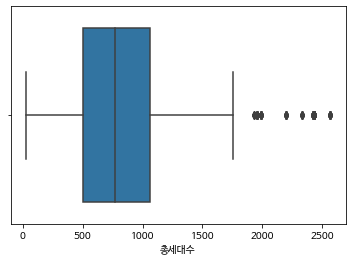

In [123]:
sns.boxplot(train['총세대수']);

In [124]:
train[train['총세대수']>2000].count()

단지코드                            84
총세대수                            84
임대건물구분                          84
지역                              84
공급유형                            84
전용면적                            84
전용면적별세대수                        84
공가수                             84
자격유형                            84
임대보증금                           43
임대료                             43
도보 10분거리 내 지하철역 수(환승노선 수 반영)    84
도보 10분거리 내 버스정류장 수              84
단지내주차면수                         84
등록차량수                           84
dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


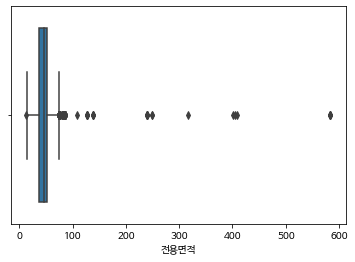

In [125]:
sns.boxplot(train['전용면적']);

In [126]:
age_gender

,지역,10대미만(여자),10대미만(남자),10대(여자),10대(남자),20대(여자),20대(남자),30대(여자),30대(남자),40대(여자),40대(남자),50대(여자),50대(남자),60대(여자),60대(남자),70대(여자),70대(남자),80대(여자),80대(남자),90대(여자),90대(남자),100대(여자),100대(남자)
0,경상북도,0.030158,0.033195,0.056346,0.061360,0.060096,0.067859,0.053433,0.049572,0.083660,0.072613,0.087149,0.072146,0.082684,0.063889,0.047717,0.030172,0.029361,0.011211,0.005578,0.001553,0.000234,0.000014
1,경상남도,0.027400,0.026902,0.053257,0.055568,0.064920,0.070618,0.056414,0.057550,0.077092,0.067600,0.086873,0.072570,0.087201,0.069562,0.048357,0.033277,0.027361,0.011295,0.004910,0.001086,0.000179,0.000010
2,대전광역시,0.028197,0.029092,0.040490,0.042793,0.060834,0.064247,0.068654,0.066848,0.074667,0.067925,0.085751,0.068819,0.088468,0.070261,0.051010,0.037143,0.032455,0.013751,0.006494,0.001740,0.000298,0.000066
3,경기도,0.038030,0.039507,0.052546,0.053990,0.058484,0.059894,0.072331,0.068704,0.083208,0.078355,0.077345,0.064859,0.074237,0.058419,0.042422,0.032725,0.025136,0.012354,0.005390,0.001707,0.000290,0.000067
4,전라북도,0.028089,0.029065,0.059685,0.060080,0.066262,0.070322,0.052027,0.046596,0.077005,0.066645,0.081408,0.074382,0.076636,0.068042,0.051025,0.035748,0.035049,0.012641,0.007223,0.001898,0.000158,0.000013
5,강원도,0.028888,0.030682,0.051287,0.052712,0.060374,0.063157,0.059821,0.054321,0.076201,0.068002,0.087266,0.072177,0.088423,0.070014,0.047732,0.032760,0.033515,0.013027,0.007628,0.001677,0.000319,0.000017
6,광주광역시,0.031994,0.034566,0.049851,0.050254,0.065084,0.066875,0.066888,0.064416,0.080028,0.079183,0.079902,0.067443,0.075930,0.059586,0.048552,0.031754,0.029749,0.010341,0.006343,0.000895,0.000353,0.000013
7,충청남도,0.031369,0.031711,0.059077,0.062422,0.067975,0.072622,0.065095,0.067303,0.078860,0.073418,0.079299,0.069167,0.070278,0.057692,0.042296,0.028682,0.024514,0.010900,0.005429,0.001549,0.000219,0.000123
8,부산광역시,0.022003,0.022947,0.032681,0.035512,0.053796,0.057233,0.047049,0.048866,0.061952,0.060769,0.082899,0.068855,0.109297,0.085294,0.078743,0.053388,0.047908,0.020228,0.008043,0.002240,0.000268,0.000028
9,제주특별자치도,0.034690,0.036695,0.060094,0.063080,0.069135,0.069667,0.050808,0.048026,0.080548,0.072530,0.088403,0.068930,0.074248,0.055717,0.047944,0.033054,0.026836,0.011332,0.006832,0.000982,0.000368,0.000082
